<a href="https://colab.research.google.com/github/sanskruti-1234/ML/blob/main/Practical_5_BonusAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
df= pd.read_csv('Sample - Superstore.csv', encoding='unicode_escape')
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [7]:
numerical_features = ['Sales', 'Quantity', 'Discount', 'Profit']
data[numerical_features] = data[numerical_features].fillna(0)
data_subset = data[numerical_features].copy()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

In [8]:
k_means_clusters = 3 # You can adjust this number
kmeans = KMeans(n_clusters=k_means_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [9]:
data_subset['KMeans_Cluster'] = kmeans_labels

In [10]:
dbscan_eps = 0.5 # You can adjust this parameter
dbscan_min_samples = 10 # You can adjust this parameter
dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [11]:
data_subset['DBSCAN_Cluster'] = dbscan_labels

Text(0.5, 1.0, 'K-Means Clustering (K=3)')

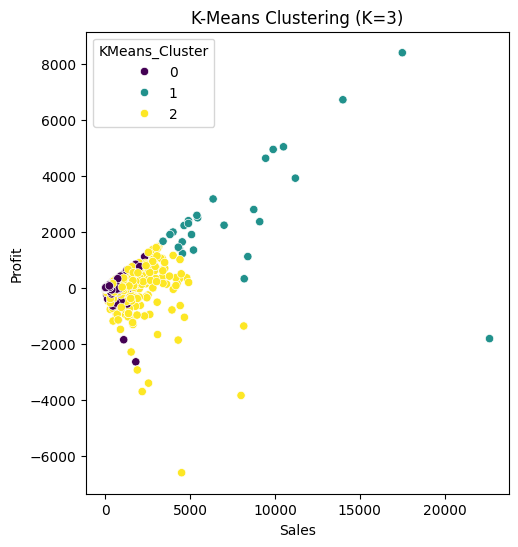

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=numerical_features[0], y=numerical_features[3], hue='KMeans_Cluster', data=data_subset, palette='viridis')
plt.title(f'K-Means Clustering (K={k_means_clusters})')

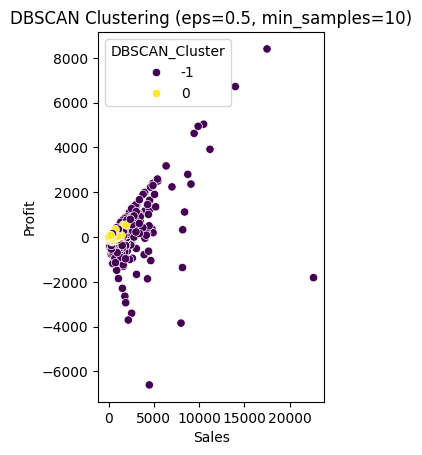

In [13]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=numerical_features[0], y=numerical_features[3], hue='DBSCAN_Cluster', data=data_subset, palette='viridis')
plt.title(f'DBSCAN Clustering (eps={dbscan_eps}, min_samples={dbscan_min_samples})')
plt.show()

In [14]:
if len(np.unique(kmeans_labels)) > 1:
    kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
    print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
else:
    print("K-Means: Cannot calculate Silhouette Score with 1 cluster.")

K-Means Silhouette Score: 0.3675


In [15]:
if len(np.unique(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
else:
    print("DBSCAN: Cannot calculate Silhouette Score with 1 cluster or all noise.")

DBSCAN Silhouette Score: 0.6304


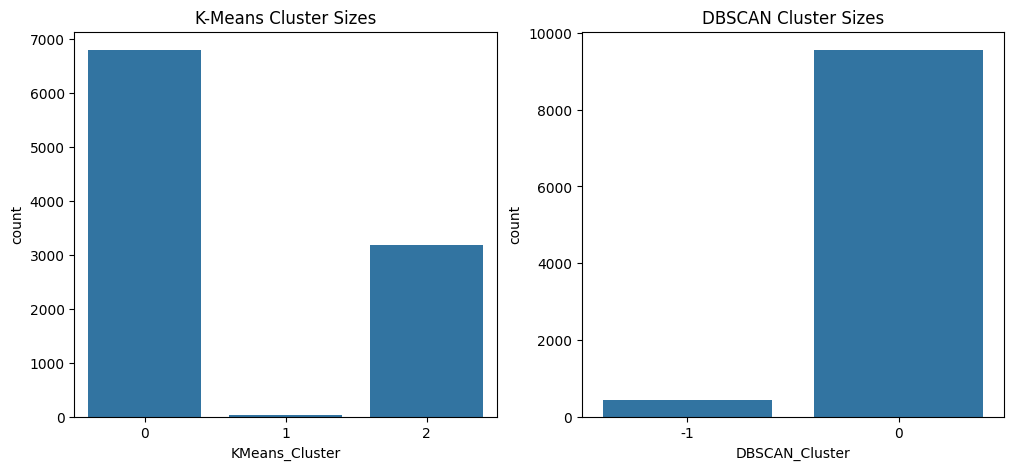

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='KMeans_Cluster', data=data_subset)
plt.title('K-Means Cluster Sizes')

plt.subplot(1, 2, 2)
sns.countplot(x='DBSCAN_Cluster', data=data_subset)
plt.title('DBSCAN Cluster Sizes')
plt.show()

In [18]:
dbscan_outliers = data_subset[data_subset['DBSCAN_Cluster'] == -1]
if not dbscan_outliers.empty:
    print(f"Number of DBSCAN Outliers: {len(dbscan_outliers)}")
else:
    print("DBSCAN: No outliers found.")

Number of DBSCAN Outliers: 435
